In [11]:
# Created by Guntaas Kapoor (guntaaskapoor.bt23cseds@pec.edu.in)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target  # Ground truth labels

In [7]:
# Apply K-Means clustering
n_clusters = 3  # Known from dataset (setosa, virginica, versicolor)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data)

## 1. Silhouette Score

#### Measures how similar a data point is to its own cluster compared to other clusters. Ranges from -1 (incorrect clustering) to 1 (ideal clustering), with values near 0 indicating overlapping clusters.

In [8]:
silhouette_avg = silhouette_score(data, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5528


## 2. Davies-Bouldin Index (DBI)

#### Evaluates the average similarity ratio between clusters, where lower values indicate better clustering. A lower DBI means clusters are well separated and compact.

In [9]:
davies_bouldin = davies_bouldin_score(data, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

Davies-Bouldin Index: 0.6620


## 3. Adjusted Rand Index (ARI)

#### Compares clustering results with a ground truth classification. Ranges from -1 (random clustering) to 1 (perfect match), with 0 meaning random assignment.

In [10]:
ari = adjusted_rand_score(true_labels, clusters)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.7302


# Visualizing

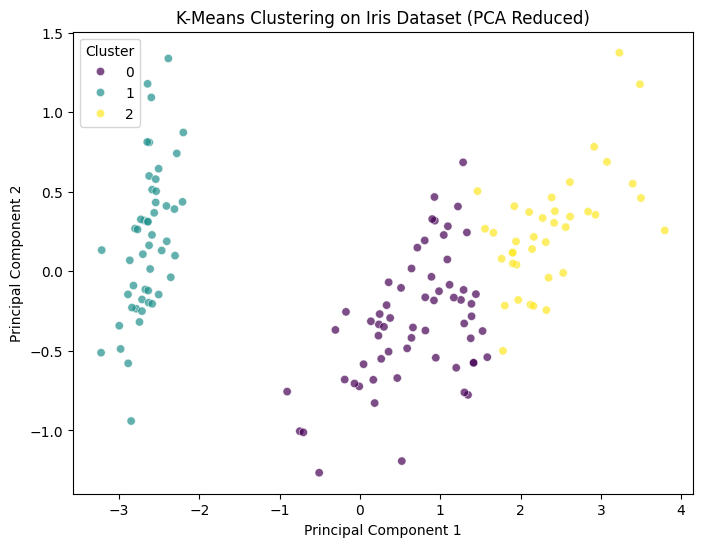

In [6]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title("K-Means Clustering on Iris Dataset (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()